In [1]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
import warnings
import os
from altair_data_server import data_server
import matplotlib.pyplot as plt
from altair_saver import save
import seaborn as sns
warnings.filterwarnings('ignore')
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')


DataTransformerRegistry.enable('data_server')

In [2]:
credit_df=pd.read_csv("../data/processed/credit_train_df.csv")
credit_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,200000,2,2,2,46,0,0,0,0,0,...,136629,139504,142269,4342,4593,14955,5143,5166,5349,0
1,50000,2,3,2,26,0,0,0,0,0,...,26999,27748,28351,1700,2000,3000,1500,1200,1136,0
2,210000,2,1,2,30,0,0,0,0,0,...,5125,5732,9297,2000,2500,2000,1000,4000,4000,0
3,90000,2,1,2,27,0,0,2,0,0,...,50611,52764,55898,4000,0,3000,3000,4000,2043,0
4,60000,1,2,1,40,0,0,0,0,0,...,22564,24191,25778,1500,1500,2000,2000,2000,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,110000,2,2,1,28,0,0,0,0,0,...,45579,46843,48062,2027,2500,2000,2000,2000,1600,0
23996,20000,2,3,2,38,-1,-1,2,0,-1,...,3668,3508,5278,5015,0,0,3508,5278,780,0
23997,150000,2,2,1,42,0,0,0,0,0,...,138016,144084,136604,6022,5022,5100,10500,0,10000,0
23998,190000,1,1,1,54,0,0,0,0,0,...,192803,161324,156576,7154,7385,7520,5593,6000,5516,0


In [3]:
describe_df=credit_df.describe()
describe_df.to_csv('../results/eda_tables/describe_df.csv')
credit_df = credit_df.rename(columns={'default payment next month': 'default_payment_next_month'})
# change target data type
credit_df["default_payment_next_month"] = credit_df["default_payment_next_month"].astype("category")
train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=522)

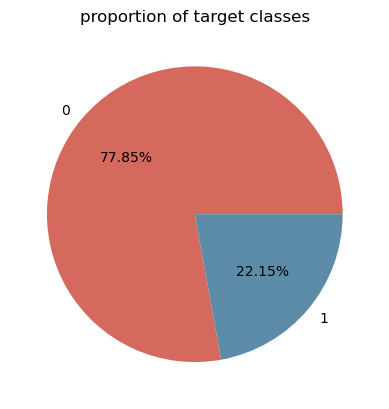

In [4]:
plt.pie(credit_df['default_payment_next_month'].value_counts(), 
        labels=['0','1'],
        colors=["#d5695d", "#5d8ca8"],
        autopct='%.2f%%',)
plt.title('proportion of target classes')
plt.plot()
plt.savefig('../results/images/target_proportion.jpg')

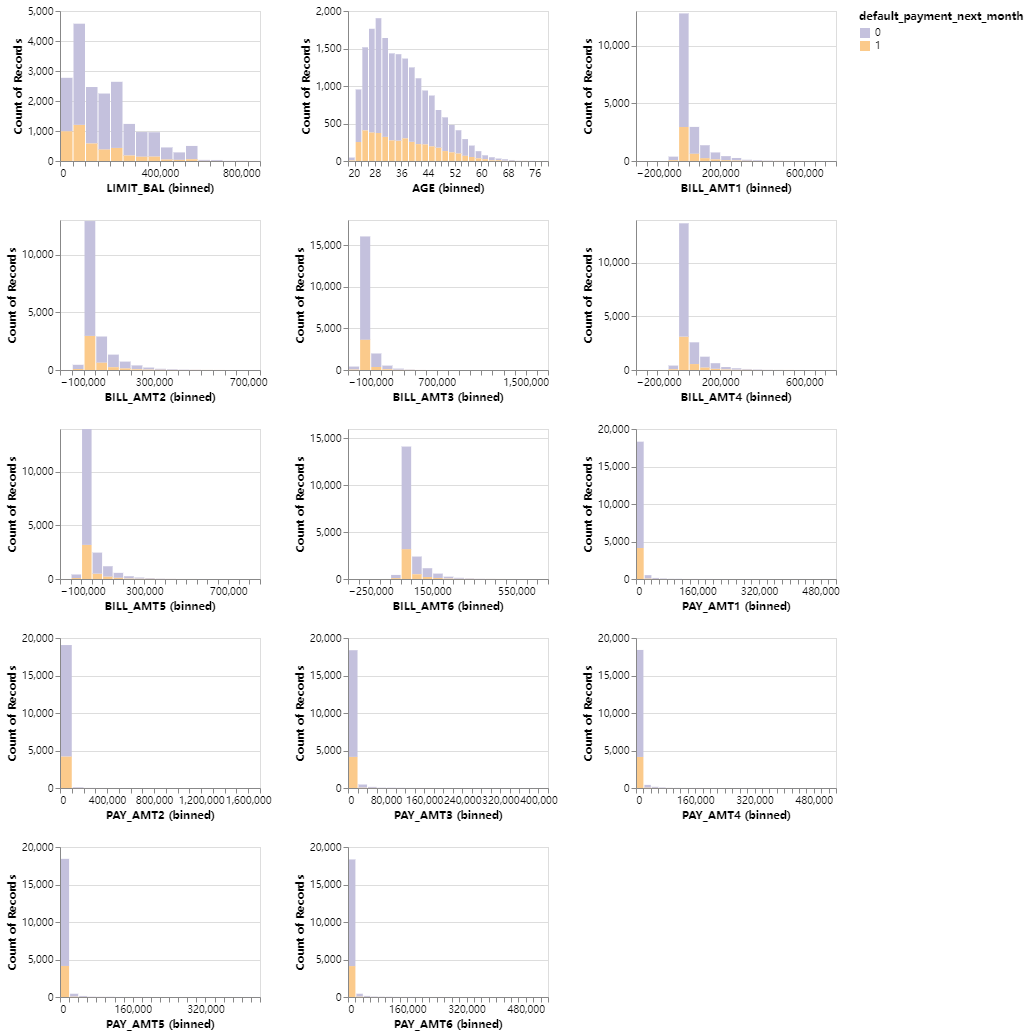

In [5]:
num_cols = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", 
            "BILL_AMT5", "BILL_AMT6", "PAY_AMT1",  "PAY_AMT2",  "PAY_AMT3", 
            "PAY_AMT4","PAY_AMT5", "PAY_AMT6"]

numeric_dis=alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
     y='count()',
    color=alt.Color('default_payment_next_month', scale=alt.Scale( scheme='purpleorange'))

     # color='default_payment_next_month'
).properties( 
    width=200,
    height=150
).repeat(
    num_cols,
    columns=3
)
# numeric_dis.save("../results/images/numeric_dis.png")
# save(numeric_dis,'../results/images/numeric_dis.png')
numeric_dis
# dist_target = numeric_dis + dist_target.mark_text(dy=-5).encode(text='count()')'
# numeric_dis = numeric_dis + numeric_dis.mark_bar(dy=-5).encode(text='count()')

# numeric_dis.save("./test.png")

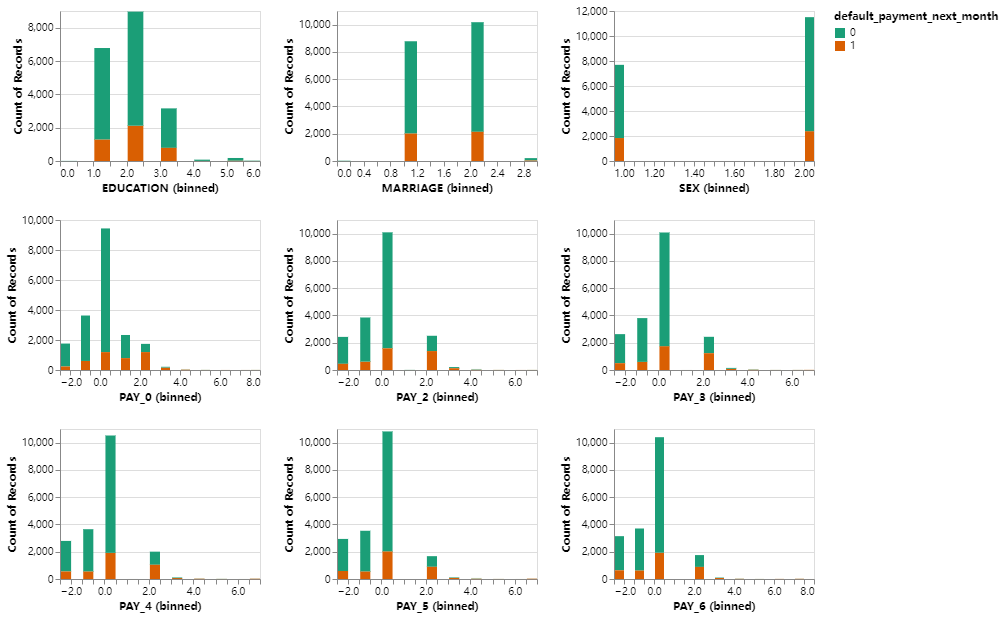

In [6]:
cat_col = ["EDUCATION", "MARRIAGE", "SEX", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

categorical_dis=alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=20)),
     y='count()',
      color=alt.Color('default_payment_next_month', scale=alt.Scale( scheme='dark2'))
).properties(
    width=200,
    height=150
).repeat(
    cat_col,
    columns=3
)
# categorical_dis.save("../results/images/categorical_dis.png")
categorical_dis

In [1]:
corr_df = train_df.corr().stack().reset_index(name='corr')
corr_plot=alt.Chart(corr_df,title="Correlation graph").mark_rect().encode(
    x='level_0',
    y='level_1',
    
   color=alt.Color('corr')).properties(width=400, height=400)
# save(corr_plot,'../results/images/corr_plot.png')

corr_plot